# Final Project: Federated Learning with Encrypted Gradient Aggregation

In this project, we will use the model from the last project, and apply Federated Learning applying encryption with secure aggregation.

In [2]:
# imports
from helper_l8 import *
import syft as sy

# Data set

For this section, we are going to use the iris data set.

In [3]:
# create the data set
X, y = generate_data()

### Data Exploration

In this section, we will explore the iris data set. The following plots shown the relationship between features in this data set. In this case, it is important to note the close relationship between features. This reamins true for all the features. If we would like to train a model, we could add some pre processing to better represent the features. However, we are focusing in the private aspect instead.

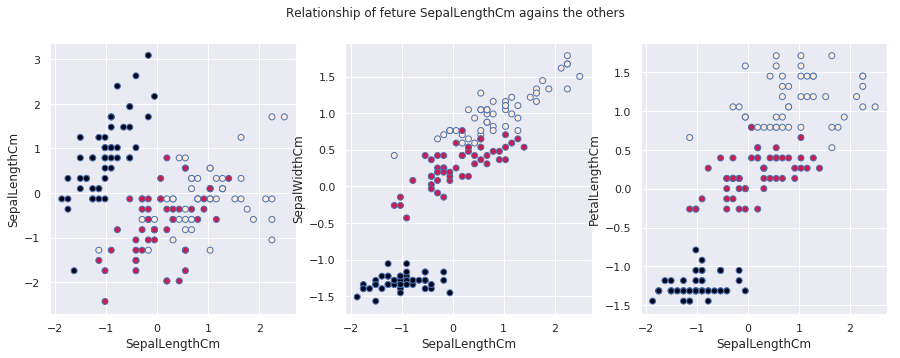

In [4]:
plot_data(X, y, feature = 0)

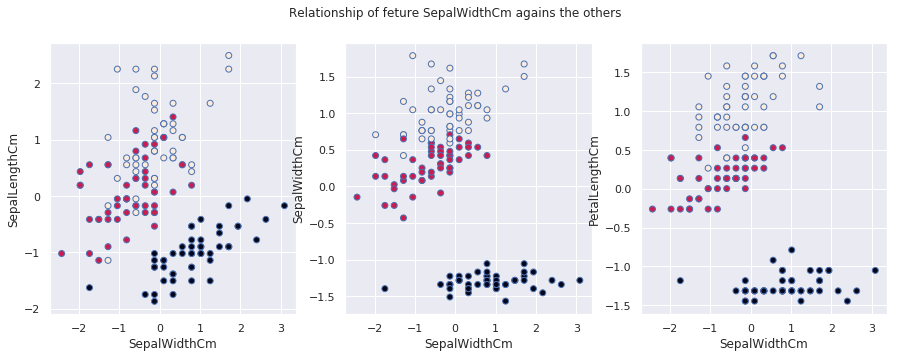

In [5]:
plot_data(X, y, feature = 1)

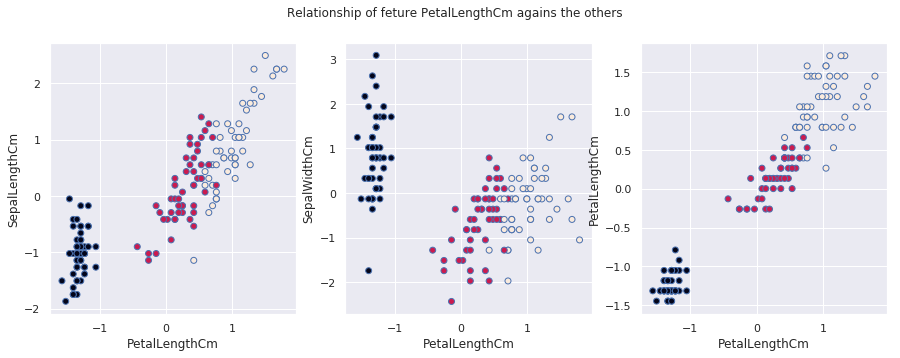

In [6]:
plot_data(X, y, feature = 2)

In [6]:
# batch size
batch_size = 8

In [7]:
train_data = T.utils.data.TensorDataset(X, y)
train_loader = T.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Virtual Workers

In this section we will define a set of three virtual workers. We will use the first two to store train a remote model. The last one will be used to average the gradients. Since we are going to use secure aggregation, the gradients will be converted to fixed precision. In order to define the workers, we will use __syft__. __Syft__ will allow us to create the virtual workers, alongisde the desire gradient encryption.

In [8]:
# set hook to use Syft nativily in pytorch.
hook = sy.TorchHook(T)

In [9]:
# define workers
worker_1 = sy.VirtualWorker(hook, id = "worker_1")
worker_2 = sy.VirtualWorker(hook, id = "worker_2")
secure_worker = sy.VirtualWorker(hook, id = "secure_worker")

In [10]:
# workers
workers = [worker_1, worker_2]

# Model

In order to apply Federated Learning, we need to send a copy of the model to each remote worker. In this case, we have defined a shallow network called __Net__. Also, we need to send the respective configuration to the workers. Otherwise, they will be unable to train with their local data.

In [11]:
# Models
lr = 1e-1

w1_model = Net()
w2_model = Net()

w1_optimizer = optim.SGD(w1_model.parameters(), lr = lr)
w2_optimizer = optim.SGD(w2_model.parameters(), lr = lr)

models = [w1_model, w2_model]
#params = [list(w1_model.parameters()), list(w2_model.parameters())]
optimizers = [w1_optimizer, w2_optimizer]

# Remote Dataset

In this section, we are sending the data to the workers. In the normal case, the workers would already have the data. However, here, we are simulating that behaviour.

In [12]:
# remote data set
remote_dataset = create_remote_dataset(workers, train_loader)

In [13]:
remote_dataset

([((Wrapper)>[PointerTensor | me:50328223559 -> worker_1:14315906653],
   (Wrapper)>[PointerTensor | me:75844939098 -> worker_1:17230189219]),
  ((Wrapper)>[PointerTensor | me:37932056988 -> worker_1:33968197949],
   (Wrapper)>[PointerTensor | me:42151516823 -> worker_1:96335109282]),
  ((Wrapper)>[PointerTensor | me:39015392698 -> worker_1:60347744208],
   (Wrapper)>[PointerTensor | me:14294371660 -> worker_1:44638155149]),
  ((Wrapper)>[PointerTensor | me:60349429531 -> worker_1:11126049901],
   (Wrapper)>[PointerTensor | me:88729752983 -> worker_1:40004468284]),
  ((Wrapper)>[PointerTensor | me:44017618903 -> worker_1:96777639795],
   (Wrapper)>[PointerTensor | me:49187292051 -> worker_1:20930525870]),
  ((Wrapper)>[PointerTensor | me:55001260214 -> worker_1:74386286628],
   (Wrapper)>[PointerTensor | me:76027132477 -> worker_1:8060752502]),
  ((Wrapper)>[PointerTensor | me:32676374501 -> worker_1:53128119493],
   (Wrapper)>[PointerTensor | me:67968050477 -> worker_1:82322356041]),


# Training

In [14]:
epochs = 50
server_model, w1_loss, w2_loss, avg_loss = federated_training(epochs, remote_dataset, models, optimizers, workers, secure_worker)

Epoch: 1|50 | Avg Loss: 1.079822109805213
Epoch: 2|50 | Avg Loss: 0.9807209372520447
Epoch: 3|50 | Avg Loss: 0.8371015323532952
Epoch: 4|50 | Avg Loss: 0.6699264215098487
Epoch: 5|50 | Avg Loss: 0.5553318113088608
Epoch: 6|50 | Avg Loss: 0.4908413787682851
Epoch: 7|50 | Avg Loss: 0.44960593349403805
Epoch: 8|50 | Avg Loss: 0.41886086844735676
Epoch: 9|50 | Avg Loss: 0.39316720101568436
Epoch: 10|50 | Avg Loss: 0.3709943037894037
Epoch: 11|50 | Avg Loss: 0.3511374220252037
Epoch: 12|50 | Avg Loss: 0.3329424129592048
Epoch: 13|50 | Avg Loss: 0.31603941155804527
Epoch: 14|50 | Avg Loss: 0.3005273573928409
Epoch: 15|50 | Avg Loss: 0.2857456910941336
Epoch: 16|50 | Avg Loss: 0.2718876484367583
Epoch: 17|50 | Avg Loss: 0.25873974710702896
Epoch: 18|50 | Avg Loss: 0.24649719066090053
Epoch: 19|50 | Avg Loss: 0.23497696055306327
Epoch: 20|50 | Avg Loss: 0.22426309188206991
Epoch: 21|50 | Avg Loss: 0.21402501314878464
Epoch: 22|50 | Avg Loss: 0.2044510609573788
Epoch: 23|50 | Avg Loss: 0.195465

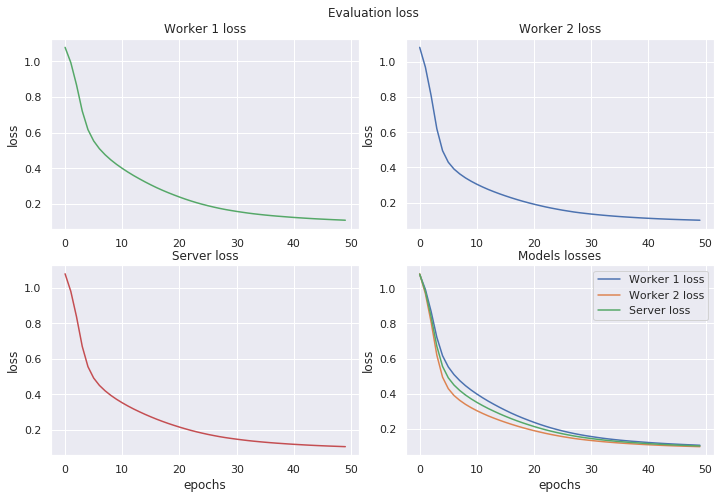

In [110]:
plot_losses(w1_loss, w2_loss, avg_loss)

In [16]:
server_model

Net(
  (fc1): Linear(in_features=4, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=3, bias=True)
)

# Evaluation

In [17]:
evaluate(X, y, server_model)

Training accuracy: 0.9866666666666667


# Conclusion

In this project, I implemented Federated Learning using encryption and trusted aggregation. These techniques allow us to add encryption to the parameters of the model. This, combined with FL, will guarantee that the model do not leak any user's information. Moreover, we can perform different operations over the encrypted parameters without revealing them. This remains true for all the members of the data and model. In this project I used the iris data set, since it was also used in the last project. I decided to perform an initial data exploration to gain a better understanding of the data. After training the remote models, each model was averaged in a trusted third party (the secure aggregator). Then, the main model, was updated with the average parameters. From the plots, we can observe the behavior of the different models, where the main model reflects the accuracy from the other two remote models. Finally, I evaluated the main model, obtaining an accuracy of 98.67%.